In [1]:
import functions as utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


##### 5.2

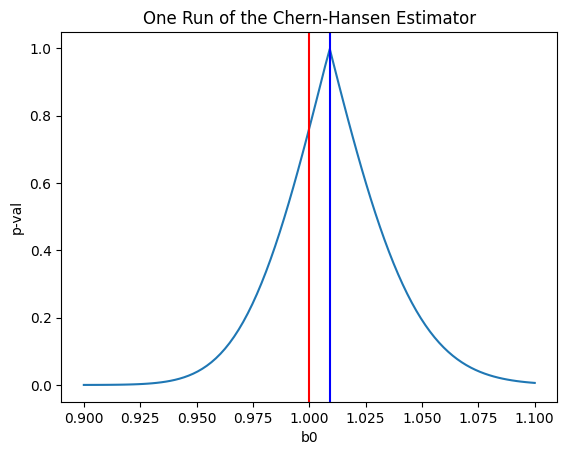

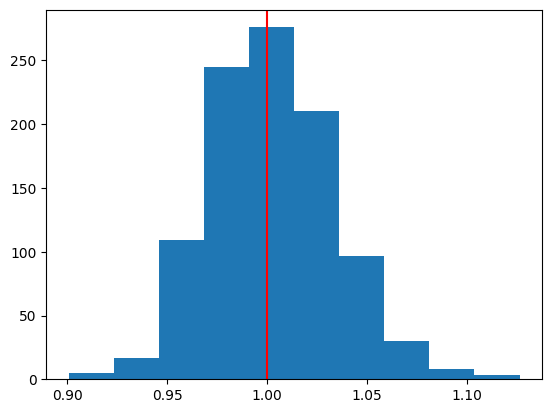

In [2]:
n = 1000
pi = 1
true_b = 1
x, y, Z = utils.dgp(n, true_b, pi)
beta_hat = minimize(lambda b: utils.chern_hansen(y,x,Z,b), x0=true_b, method = 'Nelder-Mead').x

b0s = np.linspace(0.9, 1.1, 100)
p = np.array([-utils.chern_hansen(y, x, Z, b0) for b0 in b0s])


fig, ax = plt.subplots() 
ax.plot(b0s, p)
ax.set_xlabel('b0')
ax.set_ylabel('p-val')
ax.axvline(x=true_b, color='r', label='True beta')
ax.axvline(x=beta_hat, color='b', label='Beta hat')
ax.set_title("One Run of the Chern-Hansen Estimator")
plt.show()

b_est = np.array([utils.do_chern_hansen(n, true_b, pi) for i in range(1000)])
fig, ax = plt.subplots(1,1)
ax.hist(b_est)
ax.axvline(x=true_b, color='r', label='True beta')
plt.show()

In [3]:
print(b_est.mean()) 
print(b_est.var())

1.0025221862792968
0.0009738993842815998


##### 5.3

In [8]:
## Get coverage of Chern-Hansen
print(utils.calc_coverage(b_est))

## Compare to 2SLS
from classes import Two_SLS
b = np.array([utils.do_two_sls(n, true_b, pi)[0] for i in range(500)])
print(utils.calc_coverage(b))

0.12233285535221006
0.12419878175181231


- When pi = 1, they are equally precise

##### 5.4

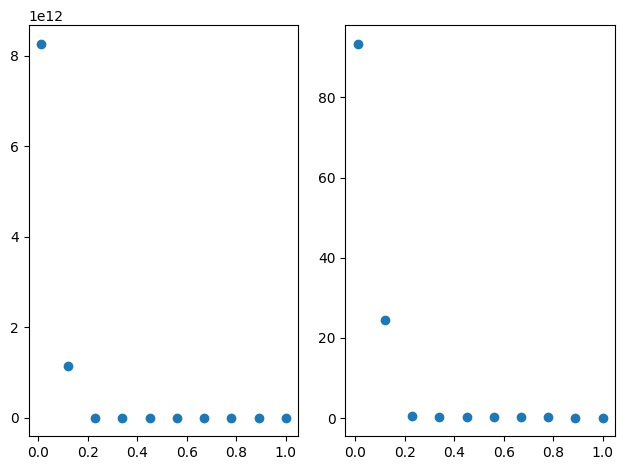

In [10]:
# What happens to Coverage when pi goes from 1 to 0?
pi = np.linspace(0.01, 1, 10)

hans_coverage = np.empty(0)
for coef in pi: 
    b_est = np.array([utils.do_chern_hansen(n, true_b, coef) for i in range(500)])
    hans_coverage = np.append(hans_coverage, utils.calc_coverage(b_est))
hans_coverage

two_sls_coverage = np.empty(0)
for coef in pi: 
    b = np.array([utils.do_two_sls(n, true_b, coef)[0] for i in range(500)])
    two_sls_coverage = np.append(two_sls_coverage, utils.calc_coverage(b))

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.scatter(pi, hans_coverage)
ax2.scatter(pi, two_sls_coverage)
fig.tight_layout()
plt.show()

In [11]:
import pandas as pd 
pd.DataFrame({'pi': pi, 'hansen': hans_coverage, '2sls': two_sls_coverage})

,pi,hansen,2sls
0,0.01,8.266232e+12,93.384401
1,0.12,1.131412e+12,24.431227
2,0.23,6.259744e-01,0.617068
3,0.34,3.689429e-01,0.373359
4,0.45,2.767296e-01,0.263952
5,0.56,2.242005e-01,0.228042
6,0.67,1.817279e-01,0.180783
7,0.78,1.637501e-01,0.162463
8,0.89,1.424588e-01,0.138149
9,1.00,1.223971e-01,0.122501


- As pi gets closer to 0, the coverage of the hansen estimator loses precision to a greater degree than 2sls. 

##### 5.5

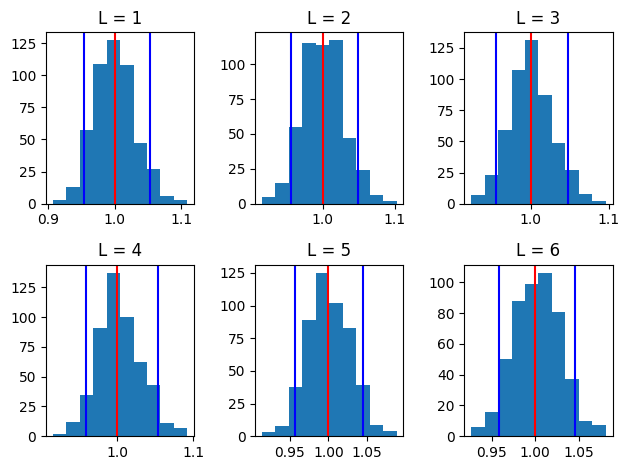

[0.12187727 0.1134044  0.11075309 0.11286016 0.10837732 0.10562523]


In [15]:
n = 1000
beta = 1
N = 6
L = range(1, N+1)

fig, ax = plt.subplots(2,3)
ax = ax.reshape(-1)
coverage = np.empty(0)
for l in L: 
    i = l-1
    pi = np.array([(.5)**(x) for x in range(l)])
    b = np.array([utils.do_chern_hansen(n, beta, pi) for i in range(500)])
    coverage = np.append(coverage, utils.calc_coverage(b))
    monte_carlo_5 = np.percentile(b, 5)
    monte_carlo_95 = np.percentile(b, 95)

    ax[i].hist(b)
    ax[i].set_title(f"L = {l}")
    ax[i].axvline(x=1, color='r', label='True beta')
    ax[i].axvline(x = monte_carlo_5, color = 'b')
    ax[i].axvline(x = monte_carlo_95, color = 'b')
    fig.tight_layout()
plt.show()

print(coverage)